In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000719220"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000719220
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,S&T BANCORP INC
Ticker,STBA


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,51.0,1.903980e+01,4.554992e+00,11.51,1.636500e+01,18.08,2.299500e+01,2.747000e+01
interest income,50.0,6.932184e+07,3.990811e+07,37843000.00,4.097900e+07,54344000.00,7.584850e+07,1.950870e+08
net income,51.0,1.749326e+07,1.460673e+07,-1240000.00,8.622500e+06,14720000.00,2.412100e+07,5.435800e+07
net interest income,50.0,5.389818e+07,2.427982e+07,33321000.00,3.571900e+07,49616500.00,5.825925e+07,1.459820e+08
provision for loan losses,50.0,6.518880e+06,1.283710e+07,-1134000.00,2.120500e+06,3709000.00,5.633250e+06,7.235400e+07


# Plots

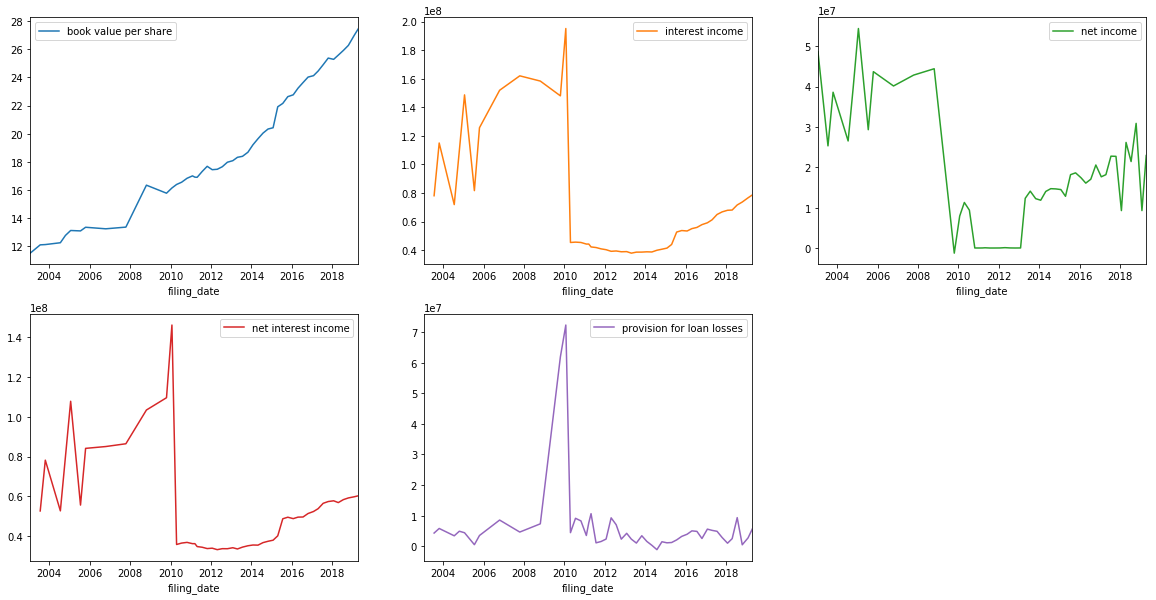

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                
0000719220 book value per share                            2003Q1    missing   
           book value per share       2003Q4 to 2004Q1: 2 periods    missing   
           book value per share                            2005Q1    missing   
           book value per share       2005Q4 to 2006Q2: 3 periods    missing   
           book value per share       2006Q4 to 2007Q2: 3 periods    missing   
           book value per share       2007Q4 to 2008Q2: 3 periods    missing   
           book value per share       2008Q4 to 2009Q2: 3 periods    missing   
           interest income            2002Q4 to 2003Q1: 2 periods    missing   
           interest income            2003Q4 to 2004Q1: 2 periods    missing   
           interest income                                 2005Q1    missing   
           interest income            2005Q4 to 2006Q2: 3 periods    missing   
           interest income            2006Q4 to 2007Q2: 3 periods    missing   
           interest income            2007Q4 to 2008Q2: 3 periods    missing   
           interest income            2008Q4 to 2009Q2: 3 periods    missing   
           net income                                      2003Q1    missing   
           net income                 2003Q4 to 2004Q1: 2 periods    missing   
           net income                                      2005Q1    missing   
           net income                 2005Q4 to 2006Q2: 3 periods    missing   
           net income                 2006Q4 to 2007Q2: 3 periods    missing   
           net income                 2007Q4 to 2008Q2: 3 periods    missing   
           net income                 2008Q4 to 2009Q2: 3 periods    missing   
           net income                                      2010Q4  duplicate   
           net income                                      2018Q4    missing   
           net interest income        2002Q4 to 2003Q1: 2 periods    missing   
           net interest income        2003Q4 to 2004Q1: 2 periods    missing   
           net interest income                             2005Q1    missing   
           net interest income        2005Q4 to 2006Q2: 3 periods    missing   
           net interest income        2006Q4 to 2007Q2: 3 periods    missing   
           net interest income        2007Q4 to 2008Q2: 3 periods    missing   
           net interest income        2008Q4 to 2009Q2: 3 periods    missing   
           provision for loan losses  2002Q4 to 2003Q1: 2 periods    missing   
           provision for loan losses  2003Q4 to 2004Q1: 2 periods    missing   
           provision for loan losses                       2005Q1    missing   
           provision for loan losses  2005Q4 to 2006Q2: 3 periods    missing   
           provision for loan losses  2006Q4 to 2007Q2: 3 periods    missing   
           provision for loan losses  2007Q4 to 2008Q2: 3 periods    missing   
           provision for loan losses  2008Q4 to 2009Q2: 3 periods    missing   
           provision for loan losses                       2010Q4  duplicate   
           total revenue                                     None      empty   

                                                 message  
cik        item                                           
0000719220 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()